# Complexity Measures

This notebooks runs complexity metrics on time series signals. 

This notebook includes:
- Hjorth parameters
- Lempel-Ziv complexity
- Lyapunov exponent

Note that while entropy measures can be considered as measures of complexity, they are considered in a separate notebook. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

from antropy import lziv_complexity

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.run import run_sims
#from apm.run import run_sims_parallel as run_sims
from apm.core.db import APMDB
from apm.methods import hjorth_activity, hjorth_mobility, hjorth_complexity, lempelziv, lyapunov
from apm.methods.settings import LZ_PARAMS, LY_PARAMS
from apm.plts.sims import plot_ap_sims, plot_pe_sims
from apm.sim.settings import SIM_PARAMS_AP, SIM_PARAMS_COMB, EXPS, FREQS, POWERS, N_SIMS, EXP
from apm.sim.examples import SIG_AP, SIG_KN, SIG_OSC, SIG_COMB

## Settings

In [3]:
# Set the random seed
set_random_seed(111)

In [4]:
# Settings for saving figures
SAVE_FIG = False
EXT = '.pdf'
FIGPATH = APMDB().figs_path / '15_complexity'

## Hjorth Parameters 

Hjorth parameters are statistical properties that can be used to characterize EEG data.

The Hjorth measures are:
- activity: represents the signal power, computed as the variance of the time series
- mobility: represents the mean frequency of the power spectrum
- complexity: represents the change in frequency

### Compute Hjorth Parameters on Examples Signals

Note that the simulated signals are normalized to a variance of one, which is why the Hjorth activity is the same for all.

#### Powerlaw Signal

In [5]:
# Check the calculated Hjorth activity values across some example signals
print('Computed Hjorth activity:')
print('  powerlaw: \t {:1.4f}'.format(hjorth_activity(SIG_AP)))
print('  osc:      \t {:6.4f}'.format(hjorth_activity(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(hjorth_activity(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(hjorth_activity(SIG_KN)))

Computed Hjorth activity:
  powerlaw: 	 1.0000
  osc:      	 1.0000
  combined: 	 1.0000
  knee:     	 1.0000


In [6]:
# Check the calculated Hjorth mobility values across some example signals
print('Computed Hjorth mobility:')
print('  powerlaw: \t {:1.4f}'.format(hjorth_mobility(SIG_AP)))
print('  osc:      \t {:6.4f}'.format(hjorth_mobility(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(hjorth_mobility(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(hjorth_mobility(SIG_KN)))

Computed Hjorth mobility:
  powerlaw: 	 0.1389
  osc:      	 0.1256
  combined: 	 0.3082
  knee:     	 0.5901


In [7]:
# Check the calculated Hjorth mobility values across some example signals
print('Computed Hjorth complexity:')
print('  powerlaw: \t {:1.4f}'.format(hjorth_complexity(SIG_AP)))
print('  osc:      \t {:6.4f}'.format(hjorth_complexity(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(hjorth_complexity(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(hjorth_complexity(SIG_KN)))

Computed Hjorth complexity:
  powerlaw: 	 10.5514
  osc:      	 1.0001
  combined: 	 4.6868
  knee:     	 2.4962


### Hjorth Parameters: Aperiodic Variations

In [8]:
# Run a set of simulations, calculating Hjorth measures across exponents
hjm_sims_exp, hjm_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, hjorth_mobility, {},
    'update_exp', EXPS, N_SIMS, var_func=np.std)
hjc_sims_exp, hjc_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, hjorth_complexity, {},
    'update_exp', EXPS, N_SIMS, var_func=np.std)

In [9]:
# Run a set of simulations, calculating Hjorth measures across exponents with an oscillation
hjm_sims_comb, hjm_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, hjorth_mobility, {},
    'update_comb_exp', EXPS, N_SIMS, var_func=np.std)
hjc_sims_comb, hjc_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, hjorth_complexity, {},
    'update_comb_exp', EXPS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


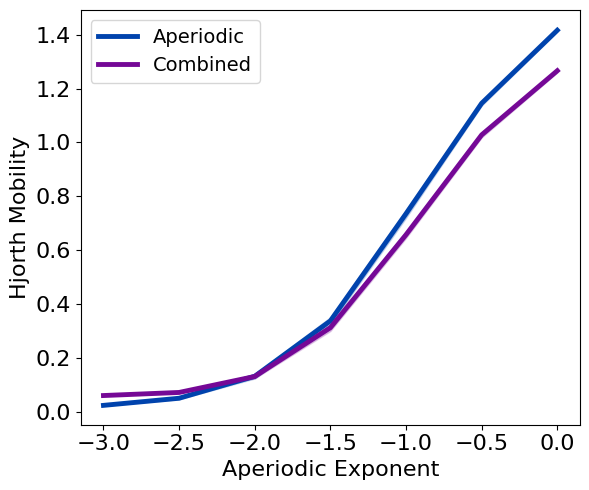

In [10]:
# Plot Hjorth mobility estimates across aperiodic variations
plot_ap_sims(hjm_sims_exp, hjm_sims_exp_var, hjm_sims_comb, hjm_sims_comb_var,
             'Hjorth Mobility', save_fig=SAVE_FIG, file_name='hjm_ap' + EXT, file_path=FIGPATH)

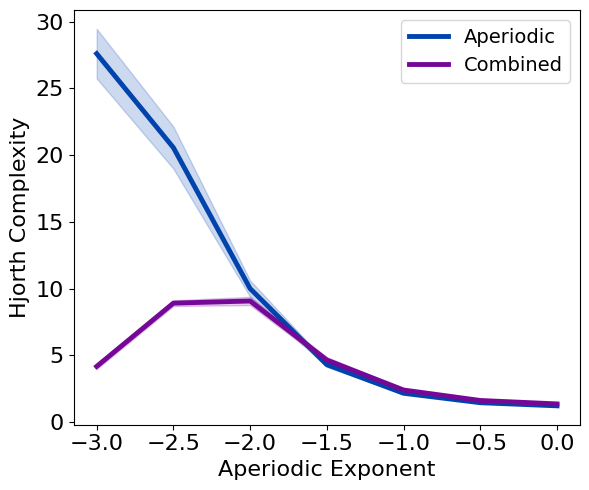

In [11]:
# Plot Hjorth complexity estimates across aperiodic variations
plot_ap_sims(hjc_sims_exp, hjc_sims_exp_var, hjc_sims_comb, hjc_sims_comb_var,
             'Hjorth Complexity', save_fig=SAVE_FIG, file_name='hjc_ap' + EXT, file_path=FIGPATH)

### Hjorth Parameters: Periodic Variations

In [12]:
# Run a set of simulations, calculating Hjorth estimates across oscillation frequency
hjm_sims_freq, hjm_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, hjorth_mobility, {},
    'update_freq', FREQS, N_SIMS, var_func=np.std)
hjc_sims_freq, hjc_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, hjorth_complexity, {},
    'update_freq', FREQS, N_SIMS, var_func=np.std)

In [13]:
# Run a set of simulations, calculating Hjorth estimates across oscillation power
hjm_sims_pow, hjm_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, hjorth_mobility, {},
    'update_pow', POWERS, N_SIMS, var_func=np.std)
hjc_sims_pow, hjc_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, hjorth_complexity, {},
    'update_pow', POWERS, N_SIMS, var_func=np.std)

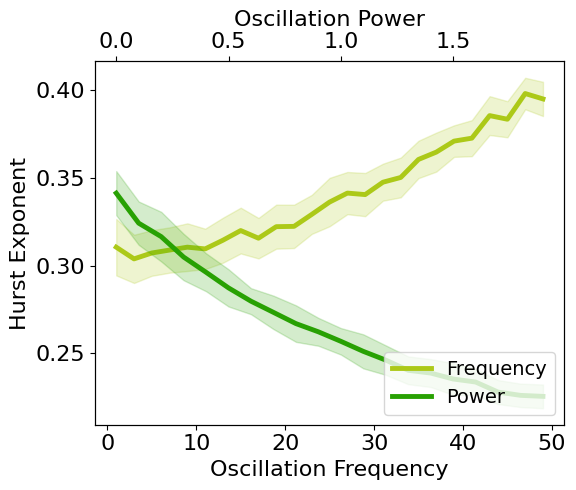

In [14]:
# Plot Hjorth mobility estimates across periodic variations
plot_pe_sims(hjm_sims_freq, hjm_sims_freq_var, hjm_sims_pow, hjm_sims_pow_var,
             'Hurst Exponent', save_fig=SAVE_FIG, file_name='hjm_pe' + EXT, file_path=FIGPATH)

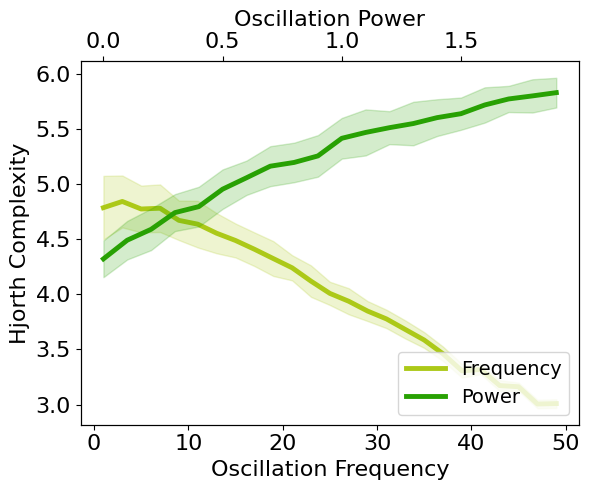

In [15]:
# Plot Hjorth complexity estimates across periodic variations
plot_pe_sims(hjc_sims_freq, hjc_sims_freq_var, hjc_sims_pow, hjc_sims_pow_var,
             'Hjorth Complexity', save_fig=SAVE_FIG, file_name='hjc_pe' + EXT, file_path=FIGPATH)

## Lempel-Ziv Complexity

Lempel-Ziv (LZ) complexity is a measure of the complexity of a time series that is sometimes applied to EEG data. 

Note that the LZ algorithm is defined for binary sequences. 

To apply this measure to neural time series, we binarize the signal by calculating whether each point is above or below the median of the time series.

In [16]:
# Check Lempel-Ziv complexity parameters
LZ_PARAMS

{'normalize': False}

In [17]:
# Example of applying LZ complexity to a binarized signal
bin_sig = np.array(SIG_AP > np.median(SIG_AP)).astype(int)
lziv_complexity(bin_sig)

220

### Calculating Lempel-Ziv Complexity on Example Signals

In [18]:
# Check Lempel-Ziv complexity measures on example signals
print('Lempel-Ziv complexity:')
print('  powerlaw: \t {:5d}'.format(lempelziv(SIG_AP, **LZ_PARAMS)))
print('  osc:      \t {:5d}'.format(lempelziv(SIG_OSC, **LZ_PARAMS)))
print('  combined: \t {:5d}'.format(lempelziv(SIG_COMB, **LZ_PARAMS)))
print('  knee:     \t {:5d}'.format(lempelziv(SIG_KN, **LZ_PARAMS)))

Lempel-Ziv complexity:
  powerlaw: 	   220
  osc:      	     5
  combined: 	   453
  knee:     	   738


### Aperiodic Variations

In [19]:
# Run a set of simulations, calculating LZ complexity across exponents
lz_sims_exp, lz_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, lempelziv, LZ_PARAMS,
    'update_exp', EXPS, N_SIMS, var_func=np.std)

In [20]:
# Run a set of simulations, calculating LZ complexity across exponents with an oscillation
lz_sims_comb, lz_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, lempelziv, LZ_PARAMS,
    'update_comb_exp', EXPS, N_SIMS, var_func=np.std)

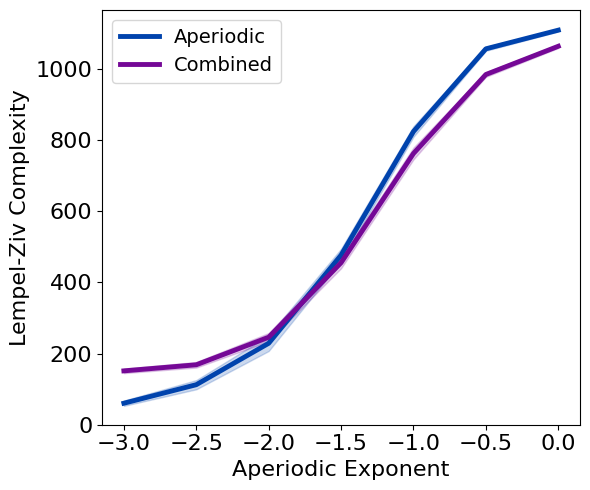

In [21]:
# Plot Lempel-Ziv complexity estimates across aperiodic variations
plot_ap_sims(lz_sims_exp, lz_sims_exp_var, lz_sims_comb, lz_sims_comb_var,
             'Lempel-Ziv Complexity', save_fig=SAVE_FIG, file_name='lz_ap' + EXT, file_path=FIGPATH)

### Periodic Variations

In [22]:
# Run a set of simulations, calculating LZ complexity across oscillation frequency
lz_sims_freq, lz_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, lempelziv, LZ_PARAMS,
    'update_freq', FREQS, N_SIMS, var_func=np.std)

In [23]:
# Run a set of simulations, calculating LZ complexity dimension across oscillation power
lz_sims_pow, lz_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, lempelziv, LZ_PARAMS,
    'update_pow', POWERS, N_SIMS, var_func=np.std)

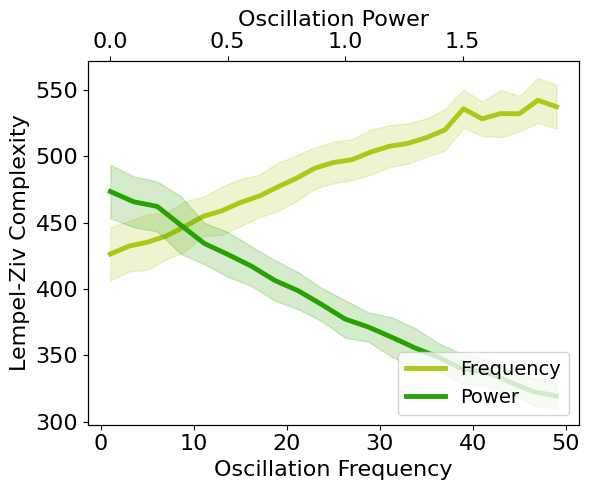

In [24]:
# Plot Lempel-Ziv complexity estimates across periodic variations
plot_pe_sims(lz_sims_freq, lz_sims_freq_var, lz_sims_pow, lz_sims_pow_var,
             'Lempel-Ziv Complexity', save_fig=SAVE_FIG, file_name='lz_pe' + EXT, file_path=FIGPATH)

## Lyapunov Exponent

In [25]:
# Check the calculated Lyapuniv exponent values across some example signals
print('Computed Lyapunov exponent:')
print('  powerlaw: \t {:1.4f}'.format(lyapunov(SIG_AP)))
print('  osc:      \t {:6.4f}'.format(lyapunov(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(lyapunov(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(lyapunov(SIG_KN)))

Computed Lyapunov exponent:
  powerlaw: 	 0.0987
  osc:      	 -0.0000
  combined: 	 0.1149
  knee:     	 0.0920


In [26]:
# Since is an expensive computation, reset to run fewer number of sims
N_SIMS = 10

### Aperiodic Variations

In [27]:
# Run a set of simulations, calculating Lyapunov exponent across exponents
ly_sims_exp, ly_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, lyapunov, LY_PARAMS,
    'update_exp', EXPS, N_SIMS, var_func=np.std)

In [28]:
# Run a set of simulations, calculating Lyapunov exponent across exponents with an oscillation
ly_sims_comb, ly_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, lyapunov, LY_PARAMS,
    'update_comb_exp', EXPS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


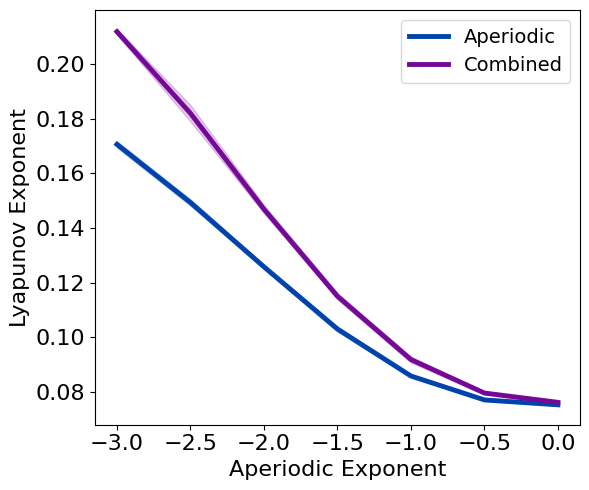

In [29]:
# Plot Lyapunov exponent estimates across aperiodic variations
plot_ap_sims(ly_sims_exp, ly_sims_exp_var, ly_sims_comb, ly_sims_comb_var,
             'Lyapunov Exponent', save_fig=SAVE_FIG, file_name='ly_ap' + EXT, file_path=FIGPATH)

### Periodic Variations

In [30]:
# Run a set of simulations, calculating Lyapunov exponent across oscillation frequency
ly_sims_freq, ly_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, lyapunov, LY_PARAMS,
    'update_freq', FREQS, N_SIMS, var_func=np.std)

In [31]:
# Run a set of simulations, calculating Lyapunov exponent across oscillation power
ly_sims_pow, ly_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, lyapunov, LY_PARAMS,
    'update_pow', POWERS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


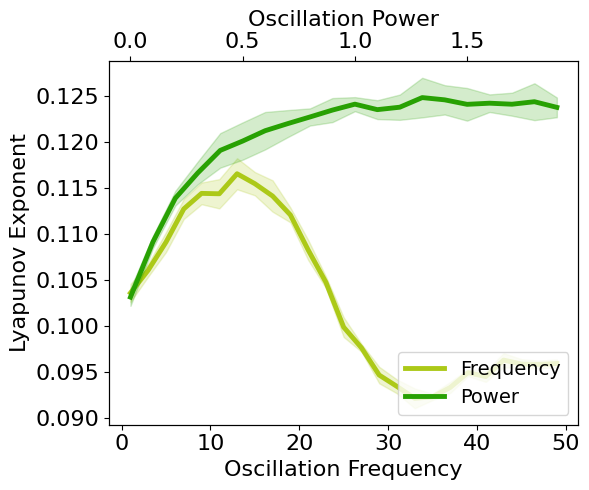

In [32]:
# Plot Lyapunov exponent estimates across periodic variations
plot_pe_sims(ly_sims_freq, ly_sims_freq_var, ly_sims_pow, ly_sims_pow_var,
             'Lyapunov Exponent', save_fig=SAVE_FIG, file_name='ly_pe' + EXT, file_path=FIGPATH)

## Conclusions

Overall, we can see the following patterns in these simulations:

Hjorth Parameters:
- mobility increases with decreasing aperiodic exponent (non-linearly) & increases with oscillation frequency & power
- complexity decreases with decreasing aperiodic exponent (non-linearly) & decreases with oscillation frequency & power

Lempel-Ziv Complexity:
- increases with decreasing aperiodic exponent, non-linearly
- increases with increasing oscillation frequency, approximately linearly
- decreases with increasing oscillation power, approximately linearly

Lyapunov Exponent:
- decreases with decreasing aperiodic exponent, non-linearly
- increases to a point, then decreases, with increases oscillation frequency, non-linearly
- increases with increasing oscillation power, non-linearly